# Computer Programming and Algorithms

## Week 9: Plotting data and using modules

* * *

<img src="https://github.com/engmaths/EMAT10007_2023/blob/main/weekly_content/img/full-colour-logo-UoB.png?raw=true" width="20%">
</p>

# Recap of the videos


- The `matplotlib` package provides a suite of functions for plotting graphs
- We can write programs to import, process, and visualise the data 
- Imported code modules can simplify these processes compared to writing our own code from scratch


# Example: Plotting

Generate a scatter plot of y against x.

```
x = list(range(10))
y = [i**2 for i in x]
```

In [ ]:
import matplotlib.pyplot as plt

x = list(range(10))
y = [i**2 for i in x]
plt.plot(x, y)
plt.xlim(0, x[-1])
plt.ylim(0, y[-1])
plt.xlabel('x')
plt.ylabel('y')
plt.show()

# Example: Importing and plotting data
Import the data in file `signal_data.csv`. 

Plot the data as a scatter graph where the first row is the x (horizontal) data and the second row is the y (vertical) data.}

Save the plot as a .pdf file

In [52]:
import sys
if 'google.colab' in sys.modules:
    !wget https://raw.githubusercontent.com/engmaths/SEMT10002_2024/main/weekly_labs/Week_09_Reading_Data/sample_data/signal_data.csv

In [ ]:
import csv
import matplotlib.pyplot as plt

with open('signal_data.csv') as file:
    
    file = csv.reader(file)
    
    file = list(file)
    
    file = [[float(i) for i in item] for item in file]
    
    plt.plot(file[0], file[1], 'o')
    
    plt.savefig('signal_data.pdf')
    
    plt.show()

# Example: Plotting multiple data series on the same graph

Import the data from `temperature_data.txt` 

Plot the data with the months on the horizontal axis and the temperature on the vertical axis for each city, as three scatter plots on the same graph. 

Add a figure legend to show which data set is which and label the axes. 

__Hint:__ this is not a CSV file so you will not be able to use the `csv` module to help with importing this data.

['Month', '01', '03', '05', '07', '09', '11', '12']
['London', '3.1', '6.2', '13.1', '17.9', '14.5', '6.7', '3.7']
['Philadelphia', '-1', '4', '16', '24', '19', '7', '2']
['Hong_Kong', '-3.5', '7', '20.5', '27', '20.5', '4.5', '-1']


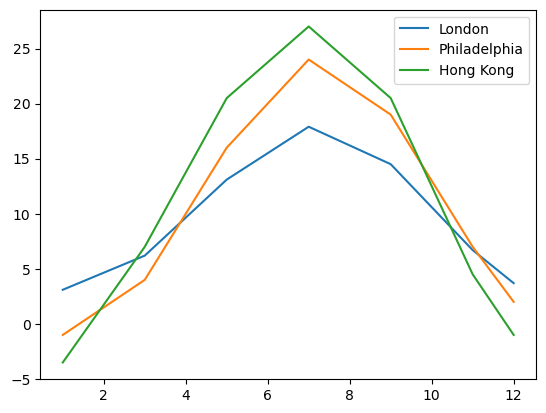

In [30]:
with open('temperature_data.txt') as file:
    data = []
    
    for line in file:
        words = line.split()
        print(words)
        words = words[1:]
        words = [float(i) for i in words]
        data.append(words)
        
plt.plot(data[0], data[1], label='London')
plt.plot(data[0], data[2], label='Philadelphia')
plt.plot(data[0], data[3], label='Hong Kong')
plt.legend()
plt.show()

# Example: Logistic growth?

Try running the following example by yourself before working through the lab exercises

During the Covid-19 pandemic, a city recorded the number of infected individuals for one year

In this example, we will plot a logistic growth curve. We will also plot the data recorded about the city to see if the data follows the logistic growth curve. 



The logistic model of population growth says that the fraction of the total population that is infected is given by
$$
f(t) = \frac{f_0 f_\infty}{f_0 + (f_\infty - f_0)e^{-rt}}
$$

* $t$ is time after the outbreak
* $r$ is the infection rate
* $f$ is the fraction of the population that has been infected
* $f_0$ is the fraction of individuals who are initially infected 
* $f_\infty$ is the final fraction of individuals who become infected

To open the data file `infections.zip` and work in this Colab notebook run the cell below

In a new code cell run: <br>`!wget https://raw.githubusercontent.com/engmaths/SEMT10002_2024/main/weekly_labs/Week_09_Modules_and_Plotting/infections.zip`<br>`!unzip week_08.zip`

You can alternatively download the data files `infections.zip` from the command line/ terminal application if you want to work on them locally on your computer. 

1. Navigate to the directory where you want to download the files using `cd`

2. Download the .zip file by running: `curl -O https://raw.githubusercontent.com/engmaths/SEMT10002_2024/main/weekly_labs/Week_09_Modules_and_Plotting/infections.zip` 

3. Then unzip the file by running: `unzip infections.zip`

In [1]:
# Module for importing data from csv files
import csv

# Module for plotting data
import matplotlib.pyplot as plt

# Import the exponential function for use within the program
from math import exp

# Importing the data

* Create two lists
    * One list should contain time data as numerical data
    * The second list should contain number of infected individuals as numerical data
    
* Create dictionary containing information about the city
    

In [2]:
# Import infection data
with open('infections/infection_data.csv') as file:
    reader = csv.reader(file)
    infection_data = list(reader)
    
# Load the city data
with open('infections/city_info.csv') as file:
    reader = csv.reader(file)
    city_data = list(reader)

In [3]:
# Get time in days
days = [int(item[0]) for item in infection_data[1:]]

# Get number of people infected at each timestep
infected = [int(item[1]) for item in infection_data[1:]]
    
# Create dictionary representation of city data
city_info = {}
for i in city_data:
    city_info[i[0]] = float(i[1])
print(city_info)

{'Total population': 250000.0, 'Initial number of infected individuals': 5000.0, 'Final number of infected individuals': 212500.0, 'Infection rate': 0.025}


# Generate logistic growth curve

Extract parameters for logistic growth model 
$$
f(t) = \frac{f_0 f_\infty}{f_0 + (f_\infty - f_0)e^{-rt}}
$$

* $t$ is time after the outbreak
* $r$ is the infection rate
* $f$ is the fraction of the population that has been infected
* $f_0$ is the fraction of individuals who are initially infected 
* $f_\infty$ is the final fraction of individuals who become infected

In [4]:
N = city_info["Total population"]

r = city_info["Infection rate"]
f_0 = city_info["Initial number of infected individuals"] / N
f_inf = city_info["Final number of infected individuals"] / N

In [5]:
# Logistic growth time series

series = []

for t in days:
    
    series.append(f_0 * f_inf / (f_0 + (f_inf - f_0) * exp(-r * t)))

# Process the data on number of infected individuals

Express the number of people infected as a fraction of the total population of the city

In [6]:
infected = [i / city_info["Total population"] for i in infected]

# Visualise the data

Plotting the raw data (scatter plot) and the logistic growth curve (line graph)

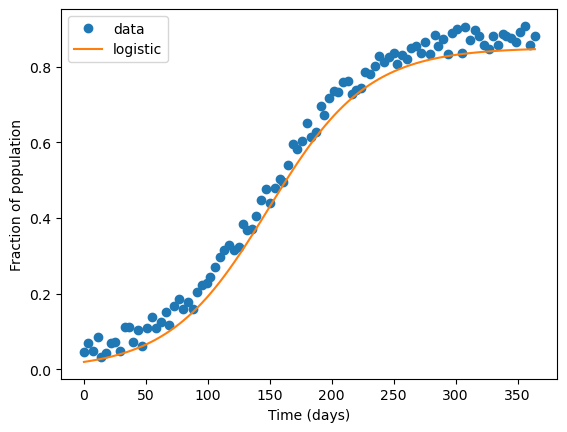

In [51]:
# Plot logistic growth curve
plt.plot(days, series, label = "logistic")

# Plot fraction of individuals infected
plt.plot(days, infected, 'o', label = "data")

plt.xlabel('Time (days)')
plt.ylabel('Fraction of population')
plt.legend()
plt.show()

# Lab exercises

Complete the exercises by working in an IDE 



# Exercise 1

1. Create three lists of integers:
```
    x = [0,2,4,5,8,10,13]
    y = [1,3,3,3,4,5,6]
    f = [-3,0,1,0,4,6,7]
```

Generate a scatter plot of `y` against  `x`

2. On the same axes, create a line plot of `f` against `x`
3. Alter your figure so it has the following:
    - The line for `f` against `x` is red 
    - x axis label: `x`
    - A legend showing which data is `f` and which is `y`
4. Save your plot as a .pdf file



# Exercise 2

The number of cyclists crossing a bridge at hourly intervals during a 24 hour period was recorded every day for 1 year.

The number of cyclist travelling:
- east
- west
- in total

within each 1 hour interval was averaged for all days of the year

Import this data from `hourly_cycle_count_weekend.csv`.

Create a scatter plot of the three sets of data, with 'Time' on the horizontal axis and 'Number of cyclists' on the vertical axis. Label the axes.

To get the data:

- Using the terminal if you are working in an IDE `curl -O https://raw.githubusercontent.com/engmaths/SEMT10002_2024/main/weekly_labs/Week_09_Modules_and_Plotting/hourly_cycle_count_weekend.csv`


- Using Colab: `!wget https://raw.githubusercontent.com/engmaths/SEMT10002_2024/main/weekly_labs/Week_09_Modules_and_Plotting/hourly_cycle_count_weekend.csv` 


# Exercise 3


The file `beam_data.csv` contains a data set of recorded parameters for a sample of wooden beams of approminately equal dimensions. 

To get the data use:

- terminal: `curl -O https://raw.githubusercontent.com/engmaths/SEMT10002_2024/main/weekly_labs/Week_09_Modules_and_Plotting/douglas_data.csv.csv` terminal


- Colab: `!wget https://raw.githubusercontent.com/engmaths/SEMT10002_2024/main/weekly_labs/Week_09_Modules_and_Plotting/douglas_data.csv.csv`

1. Calculate the second moment of area of each beam using $I$ in $\mathrm{m}^4$ (be careful to check the order of magnitude of the units used in the imported data!)

$$I = \frac{wh^3}{12}$$


$w$ is the beam width, $\mathrm{m}$
<br>$h$ is the beam height, $\mathrm{m}$

2. Calculate the natural frequency, $f_n$ in  $\mathrm{Hz}$ of each beam using:

$$f_n = \frac{\pi}{2L^2}\sqrt{\frac{EI}{\rho A}}$$


$E$ is the Young's modulus, $\mathrm{Pa}$, ($1\mathrm{GPa} = 10^9\mathrm{Pa}$)
<br>$I$ is the second moment of area, $\mathrm{m}^4$
<br>$A$ is the cross sectional area (width $\times$ height), $\mathrm{m}^2$
<br>$L$ is the beam length, $\mathrm{m}$

3. Generate a scatter plot of the density of the natural frequency against the beam density. 

4. There are 4 types of wood in the sample of beams, each with a different density and Young's modulus. We can see this as the points are clustered around 4 regions on axis showing density. <br>Sort the data points into the four types of wood, based on density, and re-plot the data so that each type of wood is plotted in a different colour. 

# Exercise 4

<img src="https://github.com/engmaths/SEMT10002_2024/blob/main/img/distance_sensor_robot
.png?raw=true" width="40%">
</p>

Open the program you generated in week 8 lab exercise 4

Plot the original data for sensor 1 (`sensor_data.csv`) and the filtered data for sensor 1 (`filtered_sensor_data.csv`), against time in seconds, as two line graphs shown on the same axes. 

Try modifying your code from week 8 to change the value of $N$, the number of values averaged, to give each filtered data point. 

Plot the data on the same axes and compare the effect of a larger value of $N$ vs a smaller value. 

Remember that the filtered data series is therefore shorter than the original data series by $N-1$ values, where $N$ is the number of values averaged by the filter at each timestep. The filtered data therefore begins $N-1$ timesteps *later* than the original data. 
